In [2]:
# Add necesary library
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]
print(X_train.shape)

11493376/11490434 [==============================] - 1s 0us/step
(50000, 28, 28)


In [0]:
# 3. Reshape lai du lieu cho dung kich thuoc bo vao keras
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [5]:
# 4. One hot encoding label y
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(" Du lieu Y ban dau :", y_train[1])
print(" Du liey Y sau one-hot encoding: ", Y_train[1])

 Du lieu Y ban dau : 0
 Du liey Y sau one-hot encoding:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Buoc nay la xay dung model de training

In [6]:
# 5. Define the model:
model = Sequential() # input -> CONV -> POOL -> CONV -> POOL -> FLATTEN -> FC -> OUTPUT
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)))

# Add Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='sigmoid'))
# Add Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flatten layer from tensor to vector
model.add(Flatten())
# Add Fully Connected Layer with 128 nodes and sigmoid
model.add(Dense(128, activation='sigmoid'))
# Outpute layer with 10 nodes and apply softmax function to change the distribution
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# 6. Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# 7. Thuc hien train model voi data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
          batch_size=32, epochs=10, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 19s 375us/step - loss: 0.2829 - acc: 0.9190 - val_loss: 0.0638 - val_acc: 0.9831
Epoch 2/10
50000/50000 [==============================] - 14s 280us/step - loss: 0.0559 - acc: 0.9843 - val_loss: 0.0586 - val_acc: 0.9834
Epoch 3/10
50000/50000 [==============================] - 14s 280us/step - loss: 0.0348 - acc: 0.9895 - val_loss: 0.0458 - val_acc: 0.9864
Epoch 4/10
50000/50000 [==============================] - 14s 279us/step - loss: 0.0240 - acc: 0.9930 - val_loss: 0.0413 - val_acc: 0.9884
Epoch 5/10
50000/50000 [==============================] - 14s 281us/step - loss: 0.0164 - acc: 0.9956 - val_loss: 0.0453 - val_acc: 0.9863
Epoch 6/10
50000/50000 [==============================] - 14s 283us/step - loss: 0.0125 - acc: 0.9963 - val_loss: 0.0398 - val_acc: 0.9878
Epoch 7/10
50000/50000 [==============================] - 14s 281us/

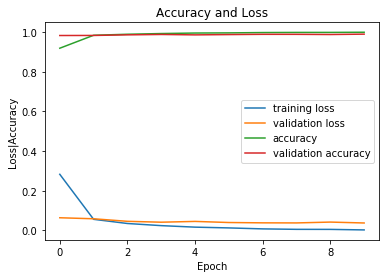

In [9]:
# 8. Data visualition
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['acc'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_acc'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [12]:
# 9. Prediction model with test datasets
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.03459913683671257, 0.9892]


Gia tri du doan:  6


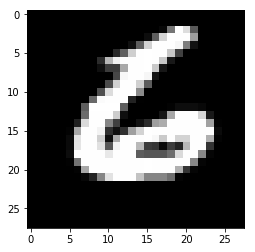

In [21]:
plt.imshow(X_test[-1].reshape(28, 28), cmap='gray')
y_predict = model.predict(X_test[-1].reshape(1, 28, 28, 1))
print('Gia tri du doan: ', np.argmax(y_predict))